In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 22 12:19:00 2025

ME 590 - Fall 2025
Prof. Carlos A. Ruvalcaba

Lagrangian position field evolution sample code


The following code supplements the exploration of a given position 
field and its evolution in time.

The code is verbosely commented, and in some cases, is considered to 
be 'heavily' commented. As this course does not require a coding
requirment to learn, modification will be explicitly stated.

Some extra spaces have been added to operations just for ease of
readability. Coding styles vary from person to person. For stricter
coding guidelines, see this example from Google

https://google.github.io/styleguide/pyguide.html

"""

# If you have not coded in python before, the following are standard
# import statements that make all the functions from the respective
# packages available to you

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# the structure of this code will 
# first: include function definitions, with calculations
# second: define problem variables
# third: plotting and visualization

In [9]:
# -------------------------------------------------------------------- 
# Functions
# -------------------------------------------------------------------- 

# we start with defining the position field evolution, Phi(tau, X),
# but we will add some constants to match our problem statement


def Phi(tau, X1, X2, a, b, c, d):
    # Phi is the position field (2 components in 2D)
    # Phi_1 = C_1 X_1 + C_2 X_2
    # Phi_2 = C_3 X_1 + C_4 X_2

    # from the problem parameters, we calculate the coefficients
    C1 = 1.0 + a * tau
    C2 = b * tau
    C3 = c * tau
    C4 = 1.0 + d * tau

    Phi1 = C1 * X1 + C2 * X2
    Phi2 = C3 * X1 + C4 * X2 

    # row vector, transformed to column vector syntax 
    Phi_vector = np.array([Phi1, Phi2]).T
    
    return Phi_vector

def V(tau, X1, X2, a, b, c, d):
    # V is the derivative of the Lagrangian position field

    V1 = a * X1 + b * X2
    V2 = c * X1 + d * X2

    # row vector, transformed to column vector syntax 
    V_vector = np.array([V1, V2]).T
    
    return V_vector

def calculate_deformation_gradient(tau, X1, X2, a, b, c, d):
    # The deformation gradient of the Lagragian position field is
    # d11, d12
    # d21, d22
    # which takes the position field vector, Phi_1, Phi_2 
    # and turns it into a tensor

    d11 = 1 + a * tau
    d12 = b * tau
    d21 = c * tau
    d22 = 1 + d * tau
    
    deformation_gradient = np.array(
        [   [d11, d12],
            [d21, d22]  ]
        )

    return deformation_gradient

def calculate_jacobian(deformation_gradient):
    # unpack matrix for simpler reading
    # note: numpy arrays and, in general, python arrays start at 
    # index = 0, instead of MatLab style indexing
    
    d11 = deformation_gradient[0,0]
    d12 = deformation_gradient[0,1]
    d21 = deformation_gradient[1,0]
    d22 = deformation_gradient[1,1]
    # straight forward calculation of a 2D Jacobian determinant
    J = d11*d22 - d12 * d21
    return J

# -- notes:
# it would be appropriate here to make clear that, given a complex
# 3D position field, we can readily use functions available in
# numpy and scipy (or MatLab for that matter) to calculate both
# the deformation gradient and the subsequent Jacobian determinant

In [10]:
# --------------------------------------------------------------------
# Problem variables
# --------------------------------------------------------------------

# here we define our problem parameters, using a=b=c=d=1.0 to start
a = 1.0
b = 1.0
c = 1.0
d = 1.0

# now we define our region of space, for our initial Labels (X1,X2)
# we have a region centered at X1=X2=0, with extends 
# X1 = [-2,2] and X2 = [-2,2]

X1_min, X1_max = -2.0, 2.0
X2_min, X2_max = -2.0, 2.0

# Computers require discrete evaluations of a continuous variable,
# thus we set our number of grid points in direction 1 = 25
# and the number of grid points in direction 2 = 25, for a total of
# 25 by 25 = 625 discrete points
# n1 * n2 = n_total

n1, n2 = 25, 25

# J_eps = 0.08

# linear vectors in X1 and X2 direction
X1 = np.linspace(X1_min, X1_max, n1)
X2 = np.linspace(X2_min, X2_max, n2)

# creates a mesh grid of points, our n1*n2 total number of points
# combination of X1 and X2 mesh point locations
X1M, X2M = np.meshgrid(X1, X2, indexing='xy')


tau = 0

# create initial Phi, V, vectors
Phi_vector = Phi(tau, X1M, X2M, a, b, c, d)
V_vector = V(tau, X1M, X2M, a, b, c, d)

# calculate deformation gradient and its Jacobian
F = calculate_deformation_gradient(tau, X1M, X2M, a, b, c, d)
J = calculate_jacobian(F)

In [11]:

# now we define our region of space, for our initial Labels (X1,X2)
# we have a region centered at X1=X2=0, with extends 
# X1 = [-2,2] and X2 = [-2,2]

X1_min, X1_max = -2.0, 2.0
X2_min, X2_max = -2.0, 2.0

# Computers require discrete evaluations of a continuous variable,
# thus we set our number of grid points in direction 1 = 25
# and the number of grid points in direction 2 = 25, for a total of
# 25 by 25 = 625 discrete points
# n1 * n2 = n_total

n1, n2 = 25, 25

# J_eps = 0.08

# linear vectors in X1 and X2 direction
X1 = np.linspace(X1_min, X1_max, n1)
X2 = np.linspace(X2_min, X2_max, n2)

# creates a mesh grid of points, our n1*n2 total number of points
# combination of X1 and X2 mesh point locations
X1M, X2M = np.meshgrid(X1, X2, indexing='xy')

tau = 0

# create initial Phi, V, vectors
Phi_vector = Phi(tau, X1M, X2M, a, b, c, d)
V_vector = V(tau, X1M, X2M, a, b, c, d)

# calculate deformation gradient and its Jacobian
F = calculate_deformation_gradient(tau, X1M, X2M, a, b, c, d)
J = calculate_jacobian(F)

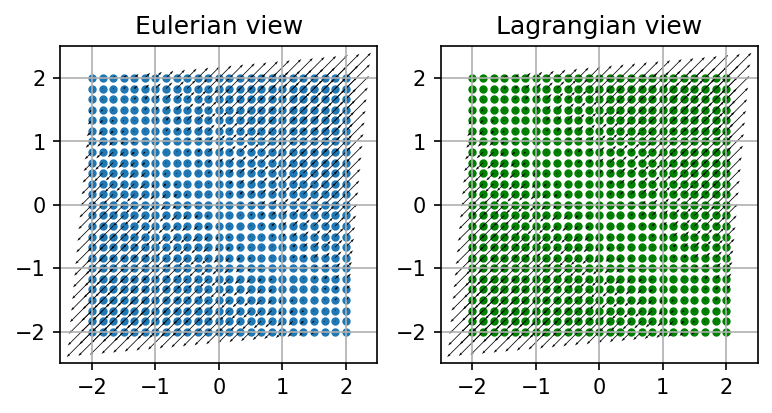

In [ ]:
# --------------------------------------------------------------------
# Visualize material region
# --------------------------------------------------------------------

# set up figure, and turn grid on
fig, axs = plt.subplots(1,2, dpi=150, figsize=[6,6])
ax = axs[0]; ax.set_title('Eulerian view')
ax.grid(True)

# fix the observer, in space to always be looking at the region 
# centered at origin
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
ax.set_aspect('equal')

# plot initial Lagrangian points
ax.scatter(Phi_vector[:,:, 0], Phi_vector[:,:, 1], marker='.')

# plot velocity vectors on Eulerian Markers
vector_plot = ax.quiver(Phi_vector[:,:, 0], Phi_vector[:,:, 1], V_vector[:,:, 0], V_vector[:,:, 1], scale_units='xy', scale=10)#, width=0.0025)

ax = axs[1]; ax.set_title('Lagrangian view')
ax.grid(True)

# fix the observer, in space to always be looking at the region 
# centered at origin
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
ax.set_aspect('equal')

# plot Lagrangian points
ax.scatter(X1M, X2M, marker='.', color='green')

# plot velocity vectors on Lagrangian Markers
vector_plot = ax.quiver(X1M, X2M, V_vector[:,:, 0], V_vector[:,:, 1], scale_units='xy', scale=10)#, width=0.0025)

# save figure using f-string formatting, with tau variable
figure_name = f'img_at_tau_{tau:2.4f}.png'
# plt.savefig(figure_name)
# plt.show()